# Projecto Integrador - **Enfasis** En Ciencia De Datos. 

>**Juan Camilo Franco Rojas**

*   Almacenamiento y recuperación De La Información.
*   Algebra En Ciencia De Datos.
*   Estadística En Analitica



In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Bloque 0** - Bibliotecas:

In [ ]:
#!pip install PyPDF2
#!pip install transformers # Pipeline T5
#!pip install transformers torch # Pipeline T5
#!pip install sentencepiece # Pipeline T5
!pip install pandas 
!pip install --upgrade transformers
# parte II
!pip install pandas
!pip install numpy
!pip install nltk
!pip install bert-extractive-summarizer
!pip install transformers
!pip install torch
!pip install bioinfokit
!pip install pandas yfinance matplotlib




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Bloque 1** - Lectura de datos:

In [ ]:
import os

def read_files(directory_path):
    file_data = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r') as file:
                data = file.read()
                file_data[filename] = data
    return file_data

directory_path = '/content/drive/MyDrive/Proyecto Integrador Fase 1 /Definitive Database'  
file_data = read_files(directory_path)
for filename, data in file_data.items():
    print(f'Archivo: {filename}\nDatos: {data[:100]}...') 


Se truncaron las últimas líneas 5000 del resultado de transmisión.

We are exposed to market risk a...
Archivo: SHW_0000089800_10K_20141231_Item7_excerpt.txt
Datos: ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS

The i...
Archivo: SHW_0000089800_EX13_20141231_Exhibit13_excerpt.txt
Datos: MANAGEMENT’S DISCUSSION AND ANALYSIS OF

 FINANCIAL CONDITION AND RESULTS OF OPERATIONS

SUMMARY

Th...
Archivo: SHW_0000089800_10K_20131231_Item1_excerpt.txt
Datos: PART I

ITEM 1. BUSINESS

Introduction

The Sherwin-Williams Company, founded in 1866 and incorporat...
Archivo: SHW_0000089800_10K_20131231_Item7A_excerpt.txt
Datos: ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSURES ABOUT MARKET RISK

We are exposed to market risk a...
Archivo: SHW_0000089800_10K_20131231_Item1A_excerpt.txt
Datos: ITEM 1A. RISK FACTORS

Described below and elsewhere in this report and other documents that we file...
Archivo: SHW_0000089800_10K_20131231_Item7_excerpt.txt
Datos

# **Bloque 2**  **Procesamiento:** Eliminar caracteres no alfabéticos y poner todo en minúsculas: No se necesita

In [ ]:
#import re
#import nltk
#from nltk.corpus import stopwords

#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

#def preprocess_data(file_data):
    #processed_data = {}
    #for filename, data in file_data.items():
        #cleaned_data = re.sub(r'[^a-z\s]', '', data.lower())
        #cleaned_data = " ".join(word for word in cleaned_data.split() if word not in stop_words)
        #processed_data[filename] = cleaned_data
    #return processed_data

#processed_data = preprocess_data(file_data)
#for filename, data in processed_data.items():
    #print(f'Archivo: {filename}\nDatos: {data[:100]}...')  # Muestra el nombre del archivo y los primeros 100 


In [ ]:
#import re

#def preprocess_data(file_data):
    #processed_data = {}
    #for filename, data in file_data.items():
        #cleaned_data = re.sub(r'[^a-z\s]', '', data.lower())
        #processed_data[filename] = cleaned_data
    #return processed_data

#processed_data = preprocess_data(file_data)
#for filename, data in processed_data.items():
    #print(f'Archivo: {filename}\nDatos: {data[:100]}...')  # Muestra el nombre del archivo y los primeros 100 caracteres de los datos

**Fin Prosesamiento** 
* Debo de explicar por que mi procesamiento es tan solo un paso

# **Bloque 3:** Uso de BERT para la Sumarización - BERT Extractive Summarizer
* En este bloque a raiz de el alto costo computacional trate de poner BERT, BART y T5 todos los descarte por la razon expuesta. 

BART (Bidirectional and Auto-Regressive Transformers) ***DESCARTADO**

# **Bloque 4.0:**  Modelos de Clasificación descartados

* Se descartaron de nuevos por su alto costo computacional 



Modelo con el uso de ventana deslizante **DESCARTADO** Se demora demaciado con apenas 197, con una base de 19K, imposible. 

# **Bloque 4:** Uso de FinBERT para la clasificación de los documentos

> Uso De FinBERT pero con *Truncado* de 512 Tokens, computacionalmente este demostro ser el mas eficiente pero no me gusta Trunkar a 512 Tokens, la razon del por que 512, es dibido a que FinBERT como longitud de vector solo permite 512**T**

> El truncado es la razon por la que no use nada del bloque 3




Dataframe de pandas 

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from scipy.special import softmax


tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

results_df = pd.DataFrame(columns=['Nombre del Archivo', 'Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo'])

for filename, data in file_data.items():

    inputs = tokenizer.encode_plus(data, return_tensors='pt', max_length=512, truncation=True).to(device)
    outputs = model(**inputs)
    scores = outputs[0][0].detach().cpu().numpy()
    scores = softmax(scores)

 
    temp_df = pd.DataFrame([{'Nombre del Archivo': filename, 'Sentimiento Positivo': scores[0], 'Sentimiento Neutral': scores[1], 'Sentimiento Negativo': scores[2]}])

    results_df = pd.concat([results_df, temp_df], ignore_index=True)


results_df['Year'] = results_df['Nombre del Archivo'].str.extract('_(\d{8})_')[0].str[:4]
results_df['Item'] = results_df['Nombre del Archivo'].str.extract('_(Item\dA?_excerpt)')[0]

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 9)

results_df


,Nombre del Archivo,Sentimiento Positivo,Sentimiento Neutral,Sentimiento Negativo,Year,Item
0,BWA_0000908255_10KA_20171231_Item7A_excerpt.txt,0.018218847,0.040635247,0.941145957,2017,Item7A_excerpt
1,BWA_0000908255_10K_20171231_Item1A_excerpt.txt,0.147306681,0.536883235,0.315810144,2017,Item1A_excerpt
2,BWA_0000908255_10K_20171231_Item1_excerpt.txt,0.178828597,0.011410622,0.809760749,2017,Item1_excerpt
3,BWA_0000908255_10K_20171231_Item7A_excerpt.txt,0.018218847,0.040635247,0.941145957,2017,Item7A_excerpt
4,BWA_0000908255_10K_20171231_Item7_excerpt.txt,0.035582561,0.044503074,0.919914365,2017,Item7_excerpt
...,...,...,...,...,...,...
19012,TSO_0000050104_10K_20151231_Item1A_excerpt.txt,0.018506669,0.829181433,0.152311862,2015,Item1A_excerpt
19013,TSO_0000050104_10K_20141231_Item7_excerpt.txt,0.217272013,0.010504594,0.772223353,2014,Item7_excerpt
19014,TSO_0000050104_10K_20141231_Item1A_excerpt.txt,0.026446806,0.437149763,0.536403418,2014,Item1A_excerpt
19015,TSO_0000050104_10K_20141231_Item1_excerpt.txt,0.028082239,0.021048957,0.950868785,2014,Item1_excerpt


# Analísis Descriptivo Sobre La clasificación De FinBERT

In [ ]:
results_df.describe()

In [ ]:
a
results_df['DocID'] = results_df['Nombre del Archivo'].str.extract('(.*)(?=Item)')





average_sentiments = results_df.groupby('DocID').agg({
    'Sentimiento Positivo': 'mean',
    'Sentimiento Neutral': 'mean',
    'Sentimiento Negativo': 'mean',
}).reset_index()


average_sentiments['Sentimiento Dominante'] = average_sentiments[['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']].idxmax(axis=1)


average_sentiments


In [ ]:

positive_sentiments = average_sentiments[average_sentiments['Sentimiento Dominante'] == 'Sentimiento Positivo']

positive_sentiments


# **Bloque 5:** Uso del diccionario Loughran and McDonald Financial Sentiment Dictionaries para la clasificación de los documentos

> Se carga el diccionario, Loughran-McDonald

> DataFrame De Pandas



In [ ]:
#import csv
#import pandas as pd
#import nltk
#from nltk.tokenize import word_tokenize
#from collections import Counter

#def load_lm_dictionary(filename):
    #lm_dictionary = {}
    #with open(filename, 'r') as file:
        #reader = csv.reader(file)
        #headers = next(reader)  # Obtén los encabezados del CSV
        #for row in reader:
            #word = row[0].lower()
            #attributes = {headers[i]: value for i, value in enumerate(row[1:], start=1)}
            #lm_dictionary[word] = attributes
    #return lm_dictionary

#  ruta al archivo que contiene el diccionario Loughran-McDonald
#lm_dictionary = load_lm_dictionary('/content/drive/MyDrive/Proyecto Integrador Fase 1 /Loughran-McDonald_MasterDictionary_1993-2021/Loughran-McDonald_MasterDictionary_1993-2021.csv')

#nltk.download('punkt')

#def classify_sentiment_lm(processed_data, lm_dictionary):
    #results_df1 = pd.DataFrame(columns=['Nombre del Archivo', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining'])
    #for filename, data in processed_data.items():
        #tokens = word_tokenize(data.lower())
        #sentiments = [lm_dictionary.get(token) for token in tokens if token in lm_dictionary]
        
        # Inicializa los contadores de sentimiento
        #sentiment_counter = { 'Negative': 0, 'Positive': 0, 'Uncertainty': 0, 'Litigious': 0, 'Strong_Modal': 0, 'Weak_Modal': 0, 'Constraining': 0 }
        
        # Incrementa los contadores según los sentimientos de las palabras en el texto
        #for sentiment in sentiments:
            #for key in sentiment_counter.keys():
                #sentiment_counter[key] += int(sentiment[key])
        
        #sentiment_counter['Nombre del Archivo'] = filename
        #temp_df1 = pd.DataFrame([sentiment_counter])
        #results_df1 = pd.concat([results_df1, temp_df1], ignore_index=True)

    #return results_df1

#results_df1 = classify_sentiment_lm(processed_data, lm_dictionary)

# Extrae el año y el ítem del nombre del archivo
#results_df1['Year'] = results_df1['Nombre del Archivo'].str.extract('_(\d{8})_')[0].str[:4]
#results_df1['Item'] = results_df1['Nombre del Archivo'].str.extract('_(Item\dA?_excerpt)')[0]

# Muestra la tabla
#results_df1



In [ ]:
#print(results_df.columns)


# **Bloque 6.0 Interpretación De Los Resultados para FinBERT**

<ipython-input-13-5e1d19e2ec88>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sentiments = results_df.groupby('Year').sum()


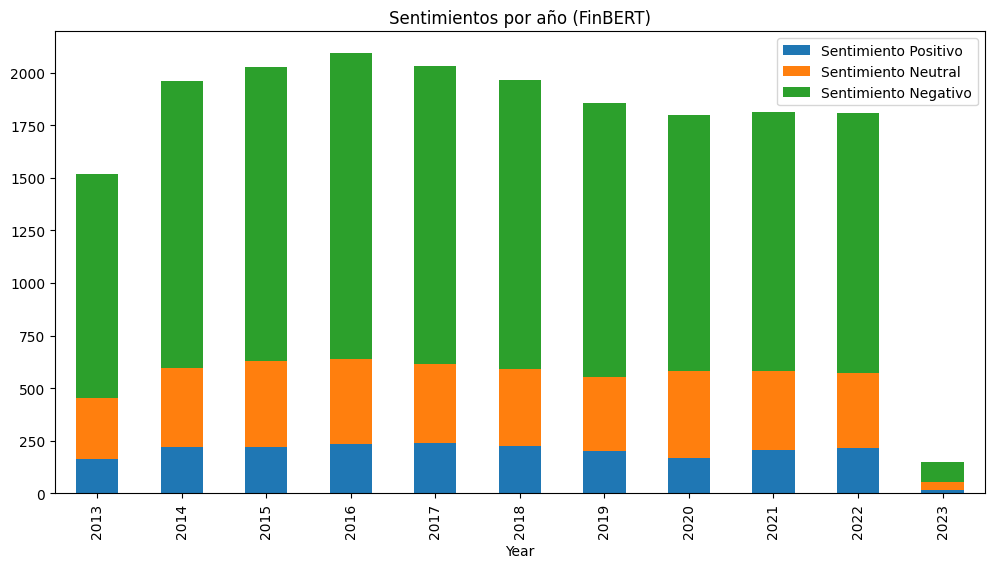

<ipython-input-13-5e1d19e2ec88>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_sentiments = results_df.groupby('Item').sum()


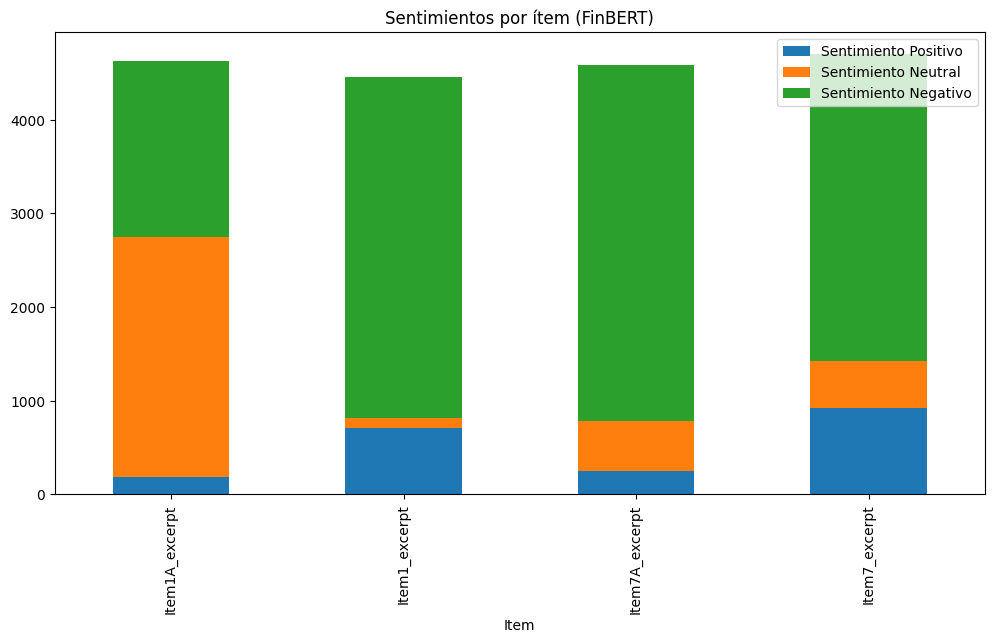

In [ ]:
import matplotlib.pyplot as plt


# Extrae el año y el ítem del nombre del archivo
results_df['Year'] = results_df['Nombre del Archivo'].str.extract('_(\d{8})_')[0].str[:4]
results_df['Item'] = results_df['Nombre del Archivo'].str.extract('_(Item\dA?_excerpt)')[0]

# Agrupa por año y suma los sentimientos
yearly_sentiments = results_df.groupby('Year').sum()

# Genera el gráfico de barras apiladas
yearly_sentiments[['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentimientos por año (FinBERT)')
plt.show()

# Agrupa por ítem y suma los sentimientos
item_sentiments = results_df.groupby('Item').sum()

# Genera el gráfico de barras apiladas
item_sentiments[['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentimientos por ítem (FinBERT)')
plt.show()



# **Bloque 7 Interpretación de los resultados para Loughran and McDonald Financial Sentiment Dictionaries**

In [ ]:
#print(results_df1.columns)


In [ ]:
#import matplotlib.pyplot as plt


# Extrae el año y el ítem del nombre del archivo
#results_df1['Year'] = results_df1['Nombre del Archivo'].str.extract('_(\d{8})_')[0].str[:4]
#results_df1['Item'] = results_df1['Nombre del Archivo'].str.extract('_(Item\dA?_excerpt)')[0]

# Agrupa por año y suma los sentimientos
#yearly_sentiments = results_df1.groupby('Year').sum()

# Genera el gráfico de barras apiladas
#yearly_sentiments[['Negative', 'Positive', 'Uncertainty',
       #'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']].plot(kind='bar', stacked=True, figsize=(12, 6))
#plt.title('Sentimientos por año (FinBERT)')
#plt.show()

# Agrupa por ítem y suma los sentimientos
#item_sentiments = results_df1.groupby('Item').sum()

# Genera el gráfico de barras apiladas
#item_sentiments[['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']].plot(kind='bar', stacked=True, figsize=(12, 6))
#plt.title('Sentimientos por ítem (Loughran-McDonald)')
#plt.show()




# Analisis De Mercado. 

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = yf.download('^GSPC', start='2014-01-01', end='2023-12-31')

data['Log_Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift())

data['Year'] = data.index.year
annual_return = data.groupby('Year')['Log_Return'].sum()

annual_return = np.exp(annual_return) - 1

plt.figure(figsize=(14,7))
plt.grid(True)
plt.style.use('dark_background')
plt.plot(data['Adj Close'], color='lightgreen')
plt.title('S&P 500 Prices 2014-2023', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

plt.figure(figsize=(14,7))
plt.grid(True)
plt.style.use('dark_background')
plt.bar(annual_return.index, annual_return.values, color='lightblue')
plt.title('S&P 500 Average Annual Returns 2014-2023', fontsize=20)
plt.ylabel('Return')
plt.xlabel('Year')
plt.show()


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


sp500 = yf.download('^GSPC', start='2014-01-01', end='2023-12-31')


sp500['return'] = sp500['Close'].pct_change()

sp500['year'] = sp500.index.year

annual_returns = sp500.groupby('year', group_keys=True)['return'].apply(lambda x: (1 + x).cumprod() - 1)


annual_returns = annual_returns.reset_index()
annual_returns['market'] = annual_returns['return'].apply(lambda x: 'Bull' if x > 0 else 'Bear')


plt.figure(figsize=(12,6))
plt.plot(sp500['Close'], color='gray')


years = mdates.YearLocator()  
years_fmt = mdates.DateFormatter('%Y')

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

for i, year in enumerate(annual_returns['year'].unique()):
    market_type = annual_returns.loc[i, 'market']
    if market_type == 'Bull':
        plt.axvspan(*mdates.datestr2num([f'{year}-01-01', f'{year+1}-01-01']), color='green', alpha=0.2)
    else:
        plt.axvspan(*mdates.datestr2num([f'{year}-01-01', f'{year+1}-01-01']), color='red', alpha=0.2)

plt.title('S&P 500 con zonas de mercados alcistas y bajistas')
plt.show()


Matriz de correlación

# **Bloque 8:** Creacion de DataFrame, Resumen de todo, hasta ahora.  

In [ ]:
results_df['Year'] = results_df['Nombre del Archivo'].str.extract('_(\d{8})_')[0].str[:4]
results_df['Year'] = results_df['Year'].astype(int)  
results_df['Item'] = results_df['Nombre del Archivo'].str.extract('_(Item\dA?_excerpt)')[0]

sp500['return'] = sp500['Close'].pct_change()

sp500['year'] = sp500.index.year

annual_returns = sp500.groupby('year', group_keys=True)['return'].apply(lambda x: (1 + x).cumprod() - 1)


annual_returns = annual_returns.reset_index()
annual_returns['market'] = annual_returns['return'].apply(lambda x: 'Bull' if x > 0 else 'Bear')


merged_df = pd.merge(results_df, annual_returns, how='inner', left_on='Year', right_on='year')

final_df = merged_df.drop(columns=['year'])
final_df


# **Bloque 9:** Matrices o Correlaciones **Descartadas**


# **Bloque 10:** Comprovando la hipotesis nula.
* Se hace correlación y **Pvalue** 

In [ ]:
import yfinance as yf
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')

sp500['return'] = sp500['Close'].pct_change()

sp500['Year'] = sp500.index.year


In [ ]:
results_df['Year'] = results_df['Year'].astype(int)

In [ ]:
merged_df = pd.merge(results_df, sp500, how='inner', on='Year')

correlation_positive = merged_df['Sentimiento Positivo'].corr(merged_df['return'])
correlation_negative = merged_df['Sentimiento Negativo'].corr(merged_df['return'])

print("La correlación entre el Sentimiento Positivo y el retorno del S&P 500 es:", correlation_positive)
print("La correlación entre el Sentimiento Negativo y el retorno del S&P 500 es:", correlation_negative)


In [ ]:
import yfinance as yf


sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')
sp500['price'] = sp500['Close']
sp500['Year'] = sp500.index.year
results_df['Year'] = results_df['Year'].astype(int)
merged_df = pd.merge(results_df, sp500, how='inner', on='Year')

correlation_positive = merged_df['Sentimiento Positivo'].corr(merged_df['price'])
correlation_negative = merged_df['Sentimiento Negativo'].corr(merged_df['price'])

print("La correlación entre el Sentimiento Positivo y el precio del S&P 500 es:", correlation_positive)
print("La correlación entre el Sentimiento Negativo y el precio del S&P 500 es:", correlation_negative)


In [ ]:
results_df['Year'] = results_df['Year'].astype(int)

sentiment_avg = results_df.groupby('Year').agg({'Sentimiento Positivo': 'mean', 'Sentimiento Negativo': 'mean'}).reset_index()

merged_df = pd.merge(annual_returns, sentiment_avg, left_on='year', right_on='Year')

correlation_pos = merged_df['return'].corr(merged_df['Sentimiento Positivo'])
correlation_neg = merged_df['return'].corr(merged_df['Sentimiento Negativo'])

print('Correlación entre retornos anuales y sentimiento positivo:', correlation_pos)
print('Correlación entre retornos anuales y sentimiento negativo:', correlation_neg) 


Correlación entre retornos anuales y sentimiento positivo: -0.005530592444871736
Correlación entre retornos anuales y sentimiento negativo: 0.16284261002709485


In [ ]:

sp500_df['Precio Var'] = sp500_df['Precio'].pct_change()

sp500_df = sp500_df.dropna()

merged_df = pd.merge(results_df, sp500_df, on='Year')

correlacion_positiva_variacion = merged_df['Sentimiento Positivo'].corr(merged_df['Precio Var'])
correlacion_negativa_variacion = merged_df['Sentimiento Negativo'].corr(merged_df['Precio Var'])

print(f"La correlación entre el Sentimiento Positivo y la variación del precio del S&P 500 es: {correlacion_positiva_variacion}")
print(f"La correlación entre el Sentimiento Negativo y la variación del precio del S&P 500 es: {correlacion_negativa_variacion}")


Si aumento mi base de datos, es posible que evite el error tipo II (aceptar incorrectamente la hipótesis nula)

# **Bloque 11:** Se aplica K-Mean a las clasificaciones del Modelo FinBERT 


In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(
    results_df[['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']]
)

results_df['Cluster'] = kmeans.labels_


# **Bloque 12:** Se plica PCA - Analisis De PCA  y graficamos **K-Means** 


Al grafica en un espacio de 3D 

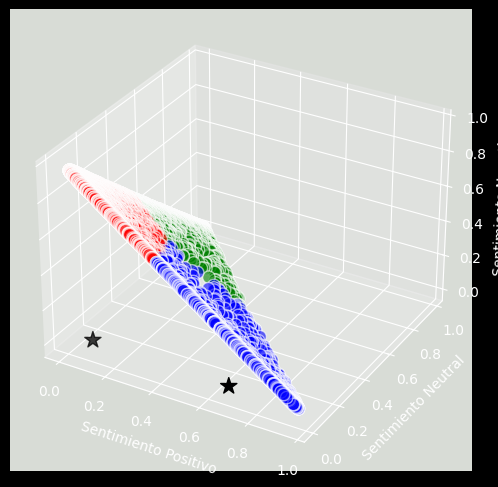

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = {0: 'r', 1: 'g', 2: 'b'}

ax.scatter(results_df['Sentimiento Positivo'], results_df['Sentimiento Neutral'], results_df['Sentimiento Negativo'], 
           c=results_df['Cluster'].apply(lambda x: colors[x]), alpha=0.6, edgecolors='w', s=80)

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='*', c='k', s=150)

ax.set_xlabel('Sentimiento Positivo')
ax.set_ylabel('Sentimiento Neutral')
ax.set_zlabel('Sentimiento Negativo')

ax.set_facecolor('xkcd:light grey')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


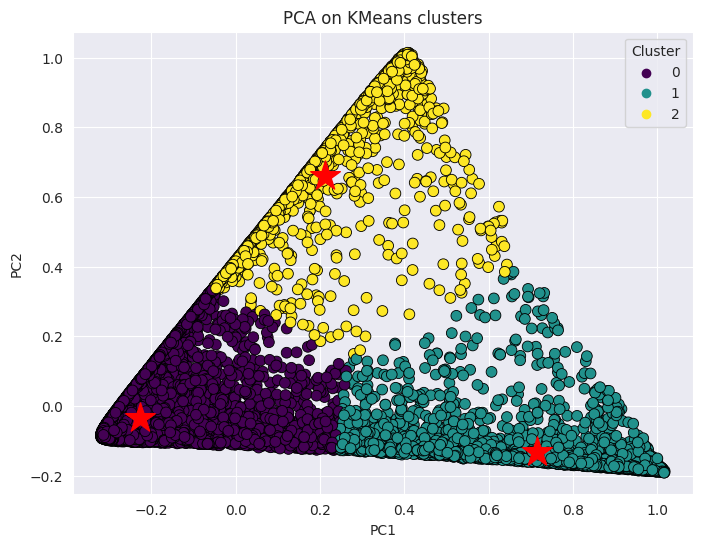

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(
    results_df[['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']]
)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df['Cluster'] = kmeans.labels_

sns.set_style("darkgrid")

plt.figure(figsize=(8,6))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=60, edgecolor='k')
plt.title('PCA on KMeans clusters')

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
scatter.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='*', s=500, c='r')

plt.show()


# Determine las componentes principales de la matriz de diseño X.

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(results_df[['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']])


In [ ]:
print(pca.components_)


[[ 0.05037696  0.680571   -0.73094803]
 [ 0.8149409  -0.4510981  -0.36384267]]


# Cuánta variabilidad explica la primera componente principal

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.772934   0.22706625]


La primera componente principal explica aproximadamente el 77,3% de la variabilidad de los datos. La segunda componente principal, por su parte, explica alrededor del 22,7% de la variabilidad de los datos.

# **Bloque 13:** Evaluación De K-Mean Silloutte - Aplicacion del K-Optimo   
* De realizar este punto.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6] 

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_result) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_result)

    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El score promedio de silueta es :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(pca_result, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 para las 0 muestras

    ax1.set_title("La trama de silueta para los distintos clusters.")
    ax1.set_xlabel("El valor de coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del Cluster")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_result[:, 0], pca_result[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("La visualización de los datos clusterizados.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Análisis de Silueta para KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()





# **Bloque 14:** Aplicando K-Mean despues de la evaluación

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sentiment_columns = ['Sentimiento Positivo', 'Sentimiento Neutral', 'Sentimiento Negativo']
sentiments = results_df[sentiment_columns]

scaler = StandardScaler()
sentiments_scaled = scaler.fit_transform(sentiments)

pca = PCA(n_components=2)
sentiments_pca = pca.fit_transform(sentiments_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


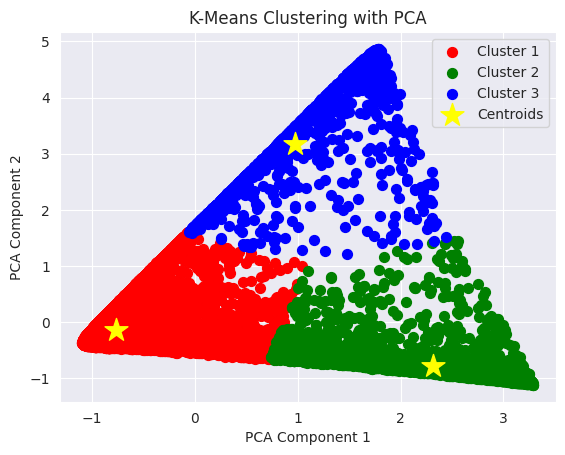

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(sentiments_pca)


labels = kmeans.labels_

import matplotlib.pyplot as plt

colores = ['r', 'g', 'b']

fig, ax = plt.subplots()


for i in range(n_clusters):
    
    points = sentiments_pca[labels == i]
    
    ax.scatter(points[:, 0], points[:, 1], s=50, c=colores[i], label=f'Cluster {i+1}')


centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Centroids')


ax.legend()
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('K-Means Clustering with PCA')


plt.style.use('dark_background')
plt.show()




# **Bloque 15:** Conclusiones Finales

In [ ]:
Kmean = pd.DataFrame()

Kmean['Nombre del Documento'] = results_df['Nombre del Archivo']
Kmean['Year'] = results_df['Year']
Kmean['Sentimiento Positivo'] = results_df['Sentimiento Positivo']
Kmean['Sentimiento Neutral'] = results_df['Sentimiento Neutral']
Kmean['Sentimiento Negativo'] = results_df['Sentimiento Negativo']
Kmean['Cluster'] = labels

Kmean.head(50)


In [ ]:

grouped = Kmean.groupby('Cluster')

for name, group in grouped:
    print("\nCluster number: ", name)
    print(group)


Cluster number:  0
                                  Nombre del Documento  Year  Sentimiento Positivo  Sentimiento Neutral  Sentimiento Negativo  Cluster
0      BWA_0000908255_10KA_20171231_Item7A_excerpt.txt  2017           0.018218847          0.040635247           0.941145957        0
2        BWA_0000908255_10K_20171231_Item1_excerpt.txt  2017           0.178828597          0.011410622           0.809760749        0
3       BWA_0000908255_10K_20171231_Item7A_excerpt.txt  2017           0.018218847          0.040635247           0.941145957        0
4        BWA_0000908255_10K_20171231_Item7_excerpt.txt  2017           0.035582561          0.044503074           0.919914365        0
5        BWA_0000908255_10K_20161231_Item7_excerpt.txt  2016           0.034353346          0.223867595           0.741779029        0
...                                                ...   ...                   ...                  ...                   ...      ...
19010  TSO_0000050104_EX991_2015123

In [ ]:
group.head(150)

,Nombre del Documento,Year,Sentimiento Positivo,Sentimiento Neutral,Sentimiento Negativo,Cluster
23,SLG_0001040971_10K_20221231_Item7_excerpt.txt,2022,0.631563663,0.054518770,0.313917518,2
38,SLG_0001040971_10K_20181231_Item7_excerpt.txt,2018,0.361049622,0.084975906,0.553974509,2
46,SLG_0001040971_10K_20161231_Item7_excerpt.txt,2016,0.666635275,0.025635231,0.307729423,2
51,SLG_0001040971_10K_20151231_Item7_excerpt.txt,2015,0.625286639,0.123530321,0.251183033,2
55,SLG_0001040971_10K_20141231_Item7_excerpt.txt,2014,0.783715010,0.011887607,0.204397365,2
...,...,...,...,...,...,...
1435,MTD_0001037646_10K_20141231_Item7_excerpt.txt,2014,0.910678148,0.011377881,0.077943951,2
1439,MTD_0001037646_10K_20131231_Item7_excerpt.txt,2013,0.723881304,0.087943874,0.188174814,2
1472,MCK_0000927653_10K_20160331_Item7_excerpt.txt,2016,0.815786064,0.118790686,0.065423310,2
1475,MCK_0000927653_10K_20150331_Item7_excerpt.txt,2015,0.815284491,0.112586848,0.072128691,2


In [ ]:
for name, group in grouped:
    print("\nCluster number: ", name)
    print(group['Nombre del Documento'])



Cluster number:  0
0        BWA_0000908255_10KA_20171231_Item7A_excerpt.txt
2          BWA_0000908255_10K_20171231_Item1_excerpt.txt
3         BWA_0000908255_10K_20171231_Item7A_excerpt.txt
4          BWA_0000908255_10K_20171231_Item7_excerpt.txt
5          BWA_0000908255_10K_20161231_Item7_excerpt.txt
                              ...                       
19010    TSO_0000050104_EX991_20151231_EX-99_excerpt.txt
19011     TSO_0000050104_10K_20151231_Item7A_excerpt.txt
19013      TSO_0000050104_10K_20141231_Item7_excerpt.txt
19015      TSO_0000050104_10K_20141231_Item1_excerpt.txt
19016     TSO_0000050104_10K_20141231_Item7A_excerpt.txt
Name: Nombre del Documento, Length: 13623, dtype: object

Cluster number:  1
1        BWA_0000908255_10K_20171231_Item1A_excerpt.txt
8        BWA_0000908255_10K_20161231_Item1A_excerpt.txt
10       BWA_0000908255_10K_20151231_Item1A_excerpt.txt
11        BWA_0000908255_10K_20151231_Item7_excerpt.txt
14       BWA_0000908255_10K_20141231_Item1A_excerpt.

In [ ]:
grouped_dfs = {}

for name, group in grouped:
    
    grouped_dfs[name] = pd.DataFrame(group['Nombre del Documento'])


for i in grouped_dfs:
    print("\nCluster number: ", i)
    display(grouped_dfs[i])



Cluster number:  0


,Nombre del Documento
0,BWA_0000908255_10KA_20171231_Item7A_excerpt.txt
2,BWA_0000908255_10K_20171231_Item1_excerpt.txt
3,BWA_0000908255_10K_20171231_Item7A_excerpt.txt
4,BWA_0000908255_10K_20171231_Item7_excerpt.txt
5,BWA_0000908255_10K_20161231_Item7_excerpt.txt
...,...
19010,TSO_0000050104_EX991_20151231_EX-99_excerpt.txt
19011,TSO_0000050104_10K_20151231_Item7A_excerpt.txt
19013,TSO_0000050104_10K_20141231_Item7_excerpt.txt
19015,TSO_0000050104_10K_20141231_Item1_excerpt.txt



Cluster number:  1


,Nombre del Documento
1,BWA_0000908255_10K_20171231_Item1A_excerpt.txt
8,BWA_0000908255_10K_20161231_Item1A_excerpt.txt
10,BWA_0000908255_10K_20151231_Item1A_excerpt.txt
11,BWA_0000908255_10K_20151231_Item7_excerpt.txt
14,BWA_0000908255_10K_20141231_Item1A_excerpt.txt
...,...
18997,HD_0000354950_10K_20140202_Item1A_excerpt.txt
19001,TSO_0000050104_10K_20171231_Item1A_excerpt.txt
19004,TSO_0000050104_10K_20161231_Item1A_excerpt.txt
19012,TSO_0000050104_10K_20151231_Item1A_excerpt.txt



Cluster number:  2


,Nombre del Documento
23,SLG_0001040971_10K_20221231_Item7_excerpt.txt
38,SLG_0001040971_10K_20181231_Item7_excerpt.txt
46,SLG_0001040971_10K_20161231_Item7_excerpt.txt
51,SLG_0001040971_10K_20151231_Item7_excerpt.txt
55,SLG_0001040971_10K_20141231_Item7_excerpt.txt
...,...
18987,HD_0000354950_10K_20170129_Item7_excerpt.txt
18988,HD_0000354950_10K_20160131_Item7_excerpt.txt
18998,HD_0000354950_10K_20140202_Item7_excerpt.txt
19000,TSO_0000050104_10K_20171231_Item7_excerpt.txt
